In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt 
import plotly.express as px

from pathlib import Path
current_dir = Path(".").resolve()
project_dir = current_dir.parent

print(current_dir)
print(project_dir)


/home/jupyter/machine_learning/notebook
/home/jupyter/machine_learning


In [2]:
file_data = os.path.join(project_dir, "data","wdbc.data") # unir el directorio, data y el nombre del archivo 
data = pd.read_csv(file_data,header=None )

In [3]:

data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = data.loc[:,2:]
y = data.loc[:,1]

In [5]:
print("X Shape:  ", X.shape)
print("y Shape:  ", y.shape)

X Shape:   (569, 30)
y Shape:   (569,)


# Dividir entranamiento y prueba 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42 ) # Cojo el (30 % Test_size= 0.3)

print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (398, 30)
y_train  (398,)
X_test  (171, 30)
y_test  (171,)


# Correlacion entre variables


In [7]:
#solo se hace con x train porque son con las que entreno, los datos test es como si fueran los nuevos que van a llegar cuando el modelo este listo 


<AxesSubplot:>

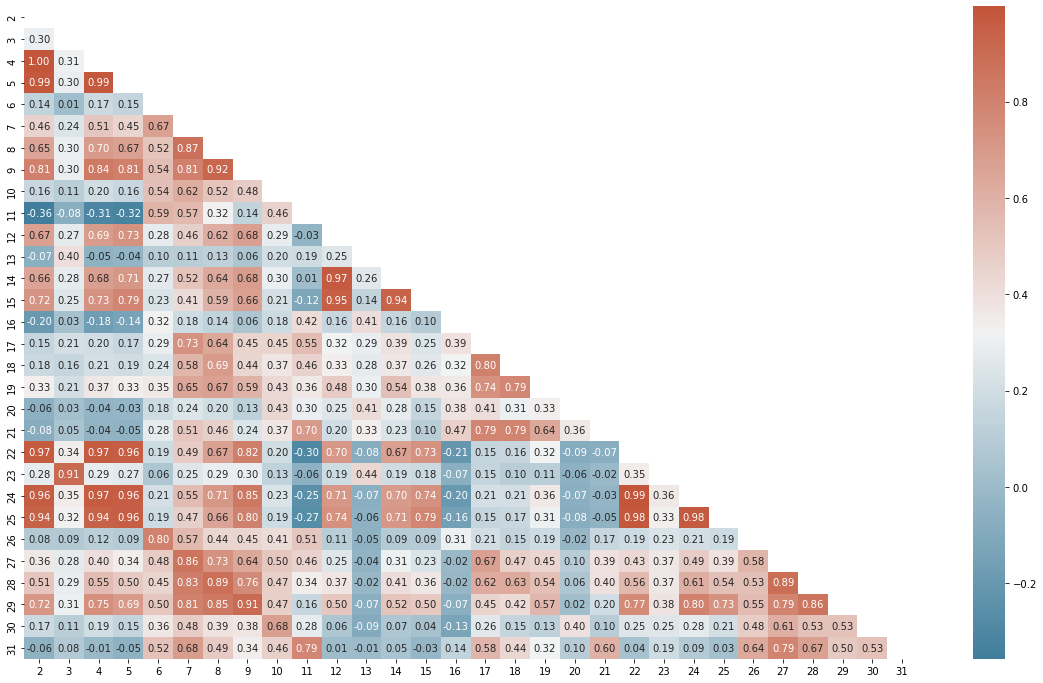

In [8]:
plt.figure(figsize =(20,12))
corr_matrix = X_train.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
cmap = sns.diverging_palette(230,20,as_cmap = True)  #es el color map 

sns.heatmap(
    corr_matrix,
    mask = mask,
    cmap = cmap,
    annot = True,
    fmt  = ".2f"
)

# Eliminar variables con alta correlacion 

In [9]:
corr_matrix = corr_matrix.abs() #valor absoluto
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.9)] #elijo las de alta correlacion, el any me dice que elimine solo 1, no todas

X_train = X_train.drop(to_drop, axis = 1) #elimino esas columnas 
X_test = X_test.drop(to_drop, axis = 1)   # se lo aplico a test tambien
X_train.head()

,6,7,10,11,13,15,16,17,18,19,20,21,23,25,26,27,28,29,30,31
149,0.07944,0.06376,0.1473,0.05580,0.7574,21.47,0.002838,0.01592,0.01780,0.005828,0.01329,0.001976,22.46,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
124,0.07115,0.07325,0.1422,0.05823,1.1400,14.66,0.005919,0.03270,0.04957,0.010380,0.01208,0.004076,22.75,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
421,0.10310,0.18360,0.2086,0.07406,1.5110,49.45,0.009976,0.05244,0.05278,0.015800,0.02653,0.005444,18.34,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
195,0.07941,0.05366,0.1829,0.05667,0.9086,15.75,0.005298,0.01587,0.02321,0.008420,0.01853,0.002152,22.00,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
545,0.09246,0.06747,0.1664,0.05801,1.3360,31.24,0.005868,0.02099,0.02021,0.009064,0.02087,0.002583,29.09,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953


In [10]:
X_train.shape

(398, 20)

In [11]:
X_test.shape

(171, 20)

# Escalado de datos 

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

print("X_train shape ", X_train_scaled.shape)
print("y_train shape ", y_train.shape)
print("X_test shape ", X_test_scaled.shape)
print("y_test shape ", y_test.shape)

X_train shape  (398, 20)
y_train shape  (398,)
X_test shape  (171, 20)
y_test shape  (171,)


# Label Encoder AKA One-Hot Encoding 

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

print(np.unique(y_train,   return_counts=True))
print(np.unique(y_train_enc,   return_counts=True))

(array(['B', 'M'], dtype=object), array([249, 149]))
(array([0, 1]), array([249, 149]))


# PCA 

In [14]:
from sklearn.decomposition import PCA

pca = PCA(0.95).fit(X_train_scaled)  #explicar las mejor o mayor varianza con los datos originales
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [15]:
pca.explained_variance_ratio_   #peso de cada componenete que va explicando la varianza 

array([0.41654914, 0.15127446, 0.11234144, 0.07288026, 0.0632658 ,
       0.05944221, 0.02480021, 0.02407337, 0.01754429, 0.01446032])

In [16]:
# Con esas 10 varaibles explico el 95% de la varianza 

In [17]:
rows = X_train.columns 

columns = []
for i in range (10):
    columns.append("PC_{}".format(i+1))
feature_importance = pd.DataFrame(
    pca.components_.T,
    index =rows, 
    columns=columns
)

In [19]:
feature_importance

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
6,0.230507,-0.011616,-0.222060,0.275118,-0.402667,-0.022116,-0.208619,-0.235246,-0.302430,0.145419
7,0.323624,-0.076590,0.006271,-0.030694,-0.066824,-0.040890,0.006902,-0.122400,-0.263102,-0.344287
10,0.238643,0.021689,-0.089826,0.300531,0.180953,-0.278398,-0.342188,-0.283515,0.523624,-0.354112
11,0.222637,0.288534,-0.291966,-0.046694,-0.091070,0.058508,0.180848,-0.330607,-0.040423,0.039411
13,0.072043,0.263156,0.275670,0.404171,0.153397,0.408086,-0.059223,-0.285806,-0.151784,0.011193
15,0.130568,-0.196910,0.420252,0.164652,-0.274411,-0.171227,0.430873,-0.245357,0.143276,0.069396
16,0.103802,0.361913,0.068602,0.237779,-0.386733,0.083520,0.114275,0.574538,0.289200,-0.238067
17,0.277535,0.193069,0.156219,-0.206371,0.121718,0.000904,0.119464,0.151623,-0.095534,-0.384899
18,0.246916,0.189993,0.231269,-0.279538,0.063109,-0.008382,-0.218897,0.064137,0.157378,0.453381
19,0.248189,0.126929,0.294054,-0.120949,-0.076611,-0.080726,-0.496204,0.069403,-0.160308,0.015629


In [20]:
total_var = pca.explained_variance_ratio_.sum() * 100 
total_var

95.66314951627743

In [21]:
variance_ratios = pd.DataFrame(
    pca.explained_variance_ratio_.reshape(1,10),
    columns=columns,
    index=["Explained Variance Ratio"]
)
variance_ratios

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
Explained Variance Ratio,0.416549,0.151274,0.112341,0.07288,0.063266,0.059442,0.0248,0.024073,0.017544,0.01446


Text(114.0, 0.5, 'Features')

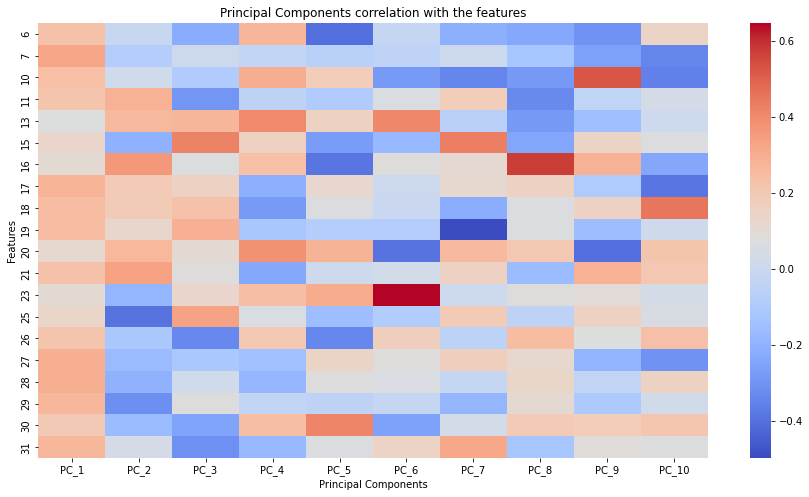

In [23]:
# Prueba de concepto 
plt.figure(figsize=(15,8))
sns.heatmap(feature_importance,cmap='coolwarm')
plt.title('Principal Components correlation with the features')
plt.xlabel('Principal Components')
plt.ylabel('Features')

# Training model 

In [28]:
from sklearn.svm import SVC 

svc = SVC(random_state = 42)
svc.fit(X_train_pca, y_train_enc)

SVC(random_state=42)

In [31]:
y_pred = svc.predict(X_test_pca) # No se evalua con los datos de entrenamiento, no tiene sentido 
#por eso pongo los datos te test, que serria como poner los datos de mañana, el modelo no los conoce

In [32]:
from sklearn.metrics import classification_report
print(
    classification_report(y_test_enc,y_pred)
)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [34]:
svc.predict(X_test_pca[100].reshape(1,-1)) #Maligno o no maligno??? 1 o 0 

array([1])

In [40]:
y_pred #la predeiccion para los 171 pacientes

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [41]:
y_test_enc 

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [49]:
count = 0 
for i in range(171):
    if y_pred[i] == y_test_enc[i]:
        count = count + 1

In [51]:
count

162

In [53]:
(count/171)*100

94.73684210526315

# Validacion cruzada

In [64]:
from sklearn.model_selection import StratifiedKFold
#Para ver si el muestreo 

In [68]:
kfold = StratifiedKFold(n_splits = 10).split(X_train_pca, y_train_enc)

scores = list()

for k, (train, test) in enumerate(kfold):
    svc.fit(X_train_pca[train], y_train_enc[train])
    
    score = svc.score(X_train_pca[test], y_train_enc[test])
    scores.append(score)
    
    print('Fold: {}, Class dist.: {}, Acc: {}'.format(k+1, np.bincount(y_train_enc[train]), score) )

print('CV accuracy: {} +/- {}'.format(
    np.round(np.mean(scores), 2),
    np.round(np.std(scores), 2)
))

Fold: 1, Class dist.: [224 134], Acc: 0.975
Fold: 2, Class dist.: [224 134], Acc: 0.975
Fold: 3, Class dist.: [224 134], Acc: 0.95
Fold: 4, Class dist.: [224 134], Acc: 0.975
Fold: 5, Class dist.: [224 134], Acc: 0.95
Fold: 6, Class dist.: [224 134], Acc: 0.975
Fold: 7, Class dist.: [224 134], Acc: 1.0
Fold: 8, Class dist.: [224 134], Acc: 0.925
Fold: 9, Class dist.: [224 135], Acc: 0.9743589743589743
Fold: 10, Class dist.: [225 134], Acc: 0.9230769230769231
CV accuracy: 0.96 +/- 0.02


In [66]:
#CV valor central como el promedio, desviacion de estandar (+/-) es muy bajo 

In [71]:
from sklearn.model_selection import cross_val_score    
#Para bases de datos grandes  
scores = cross_val_score(
    estimator =svc,
    X = X_train_pca,
    y = y_train_enc,
    cv = 10, 
    n_jobs= 1 # numero de nucleos, para correr bases de datos grandes 
)
print('CV accuracy: {} +/- {}'.format(
    np.round(np.mean(scores), 2),
    np.round(np.std(scores), 2)
))

CV accuracy: 0.96 +/- 0.02


# Curvas de validación 

In [75]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=svc,
    X=X_train_pca,
    y=y_train_enc,
    train_sizes = np.linspace(0.1,1.0,10),
    cv=10,
    n_jobs=1
)

In [76]:
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

test_mean  = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

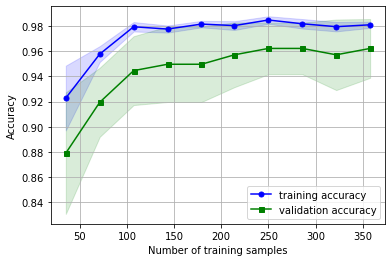

In [77]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [78]:
from sklearn.model_selection import GridSearchCV
#prueba parametros en ciclos, con los parametros que queramos

values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4] 
red_parametros = [
    {'C': values, 'kernel': ['linear'] },
    {'C': values, 'kernel': ['rbf'], 'gamma':values}
]


gs = GridSearchCV(
    estimator  = svc,
    param_grid = red_parametros,
    scoring    = 'accuracy',
    cv         = 10,
    n_jobs     = -1
)

In [79]:
gs = gs.fit(X_train_scaled, y_train_enc)
print(gs.best_score_)
print(gs.best_params_)

0.9698076923076921
{'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}
